In [288]:
import pandas as pd
import numpy as np
import datetime
from utils import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# import numpy as np

In [92]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Data

In [2]:
census_file = "../Data/2019-09-13Census and Surgical Admits and Scheduled 2.csv"

df_census = pd.read_csv(census_file, index_col = 0)
df_census = convert_datatimes(df_census)

/Users/Teng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# filter out the data by time
start_date = datetime.datetime(year = 2019, month = 1, day = 1)
df_census_2019 = df_census.loc[df_census['Effective Date/Time'] >= start_date]

## Unit-service explore

In [19]:
major_units

Index(['NN', 'NICU270', 'PCU300', 'PCU200', 'CVICU220', 'PCU400', 'MAT292',
       'MAT192', 'PICU420', 'HOPCU', 'ICN1', 'SCTPCU', 'LDR', 'PICU320',
       'PCU360', 'CCP', 'ICN2', 'NICU260', 'MAT350', 'SEQN', 'SSU', 'PEC',
       'PCU380', 'CVICU320', 'PAC', 'BCDHPAC', 'APU', 'INFUS'],
      dtype='object')

In [41]:
# print the major services in each unit
print_services_in_units(df)

Major Services in[ NN ]:::::::
General Pediatrics    3283
Neonatology           3192
Newborn Nursery          2
Obstetrics               1
Intensive Care           1
Name: Service.x, dtype: int64


Major Services in[ NICU270 ]:::::::
Neonatology             6046
Cardiology                37
Intensive Care            24
General Pediatrics        13
General Surgery           10
Neurosurgery               9
Otolaryngology (ENT)       6
Newborn Nursery            3
Ophthalmology              1
Orthopedics                1
Name: Service.x, dtype: int64


Major Services in[ PCU300 ]:::::::
Gastroenterology        1289
Nephrology               929
General Pediatrics       907
General Surgery          731
Liver Transplant         267
Otolaryngology (ENT)     234
Pulmonary                207
Urology                  183
Transplant Surgery       179
Intensive Care           130
Name: Service.x, dtype: int64


Major Services in[ PCU200 ]:::::::
Cardiology                3929
General Pediatrics   

In [30]:
# PCU 380?
temp = df_census_2019.loc[df_census_2019['Dept Abbrev'] == 'PCU200']
temp['Effective Date/Time'].min()

Timestamp('2019-01-01 23:59:00')

Note: it seems that PCU380 is (re?)opened since mid Jun, 2019. Thus we might want to consider the data up to 
May 2019

In [27]:
end_date = datetime.datetime(year = 2019, month = 5, day =31)
df_census_2019_to_may = df_census_2019.loc[df_census_2019['Effective Date/Time']<=end_date]

## Filter out specific units and services

In [38]:
# Units to consider
units_to_consider = ['HOPCU', 'SCTPCU', 'PCU300', 'PCU360', 'PCU400']
df_to_work = df_census_2019_to_may.loc[df_census_2019_to_may['Dept Abbrev'].isin(units_to_consider)]

In [95]:
df_to_work['Service.x'].value_counts()

Hematology/Oncology         2647
General Pediatrics          1999
Stem Cell Transplant        1403
Pulmonary                   1111
Gastroenterology             931
General Surgery              776
Nephrology                   541
Neurosurgery                 493
Orthopedic Surgery           277
Neurology                    245
Liver Transplant             166
Otolaryngology (ENT)         143
Intensive Care               110
Urology                      104
Rheumatology                  91
Transplant Surgery            89
Plastic Surgery               82
Orthopedics                   75
Oncology                      57
Neonatology                   54
Pain Management               52
Interventional Radiology      45
GI/Liver                      34
***                           16
Anesthesia                    14
Cardiology                    11
Trauma                         7
Adolescent Medicine            4
Kidney Transplant              4
Hand                           4
Endocrinol

In [109]:
service_thresh = 20
temp = df_to_work['Service.x'].value_counts().reset_index()
services_to_consider = temp.loc[temp['Service.x'] >= service_thresh]['index'].to_list()
print('consider', len(services_to_consider), 'services!!')
df_to_work = df_to_work.loc[df_to_work['Service.x'].isin(services_to_consider)]

consider 23 services!!


In [108]:
services_to_consider

['Hematology/Oncology',
 'General Pediatrics',
 'Stem Cell Transplant',
 'Pulmonary',
 'Gastroenterology',
 'General Surgery',
 'Nephrology',
 'Neurosurgery',
 'Orthopedic Surgery',
 'Neurology',
 'Liver Transplant',
 'Otolaryngology (ENT)',
 'Intensive Care',
 'Urology',
 'Rheumatology',
 'Transplant Surgery',
 'Plastic Surgery',
 'Orthopedics',
 'Oncology',
 'Neonatology',
 'Pain Management',
 'Interventional Radiology',
 'GI/Liver']

In [110]:
print_services_in_units(df_to_work)

Major Services in [ PCU300 ] :::::::
Gastroenterology        801
General Pediatrics      616
Nephrology              510
General Surgery         410
Pulmonary               183
Liver Transplant        166
Urology                 102
Transplant Surgery       89
Otolaryngology (ENT)     80
Rheumatology             63
Name: Service.x, dtype: int64


Major Services in [ PCU400 ] :::::::
General Pediatrics    1003
Pulmonary              899
Neurosurgery           491
Neurology              239
Orthopedic Surgery     219
General Surgery        100
Orthopedics             58
Gastroenterology        40
Pain Management         25
Neonatology             18
Name: Service.x, dtype: int64


Major Services in [ HOPCU ] :::::::
Hematology/Oncology     1689
Stem Cell Transplant     232
Oncology                  43
Intensive Care            13
General Pediatrics        11
Neurology                  2
General Surgery            2
Nephrology                 1
Orthopedics                1
Pulmonary      

In [111]:
print_units_of_services(df_to_work)

Major Units of Service [ Hematology/Oncology ] :::::::
HOPCU     1689
SCTPCU     487
PCU360     466
PCU300       4
PCU400       1
Name: Dept Abbrev, dtype: int64


Major Units of Service [ General Pediatrics ] :::::::
PCU400    1003
PCU300     616
PCU360     364
HOPCU       11
SCTPCU       5
Name: Dept Abbrev, dtype: int64


Major Units of Service [ Stem Cell Transplant ] :::::::
SCTPCU    1146
HOPCU      232
PCU300      16
PCU360       9
Name: Dept Abbrev, dtype: int64


Major Units of Service [ Pulmonary ] :::::::
PCU400    899
PCU300    183
PCU360     28
HOPCU       1
Name: Dept Abbrev, dtype: int64


Major Units of Service [ Gastroenterology ] :::::::
PCU300    801
PCU360     89
PCU400     40
SCTPCU      1
Name: Dept Abbrev, dtype: int64


Major Units of Service [ General Surgery ] :::::::
PCU300    410
PCU360    259
PCU400    100
SCTPCU      5
HOPCU       2
Name: Dept Abbrev, dtype: int64


Major Units of Service [ Nephrology ] :::::::
PCU300    510
PCU400     15
PCU360     15
HOP

## Unit capacity

In [112]:
df_to_work.loc[:,'Date']  = df_to_work['Effective Date/Time'].dt.date

/Users/Teng/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [115]:
unit_daily_cap = df_to_work.groupby(['Dept Abbrev', 'Date']).size().reset_index()
unit_daily_cap = unit_daily_cap.rename(columns = {0:'Occupacy'})
unit_cap = unit_daily_cap.groupby('Dept Abbrev')['Occupacy'].max().reset_index()

In [116]:
unit_cap

,Dept Abbrev,Occupacy
0,HOPCU,15
1,PCU300,26
2,PCU360,14
3,PCU400,24
4,SCTPCU,12


In [189]:
unit_cap_dict = {unit_cap.loc[i, 'Dept Abbrev']: unit_cap.loc[i, 'Occupacy'] for i in range(len(units_to_consider))}

In [190]:
unit_cap_dict

{'HOPCU': 15, 'PCU300': 26, 'PCU360': 14, 'PCU400': 24, 'SCTPCU': 12}

## Daily service counts

In [161]:
# service_count_daily = pd.DataFrame()

service = services_to_consider[0]
temp = df_to_work.loc[df_to_work['Service.x'] == service]
temp = temp.groupby('Date')['Service.x'].size().reset_index()
service_count_daily = temp.rename(columns = {'Service.x':service})

for service in services_to_consider[1:]:
    temp = df_to_work.loc[df_to_work['Service.x'] == service]
    temp = temp.groupby('Date')['Service.x'].size().reset_index()
    service_count_daily = service_count_daily.merge(temp.rename(columns = {'Service.x':service}), 
                                                    on = 'Date', how = 'left')
service_count_daily = service_count_daily.fillna(0)

# sanity check: if we missed some days
days_range = (service_count_daily['Date'].max() - service_count_daily['Date'].min()) / datetime.timedelta(days = 1)
assert (days_range+1 == service_count_daily.shape[0]), "Range not match!"

In [162]:
service_count_daily

,Date,Hematology/Oncology,General Pediatrics,Stem Cell Transplant,Pulmonary,Gastroenterology,General Surgery,Nephrology,Neurosurgery,Orthopedic Surgery,...,Urology,Rheumatology,Transplant Surgery,Plastic Surgery,Orthopedics,Oncology,Neonatology,Pain Management,Interventional Radiology,GI/Liver
0,2019-01-01,13,12,8,6,7,2.0,3.0,2.0,1.0,...,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-02,15,12,9,6,6,2.0,4.0,3.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2019-01-03,19,12,8,5,6,1.0,5.0,6.0,0.0,...,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2019-01-04,18,9,8,6,9,1.0,4.0,6.0,2.0,...,1.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2019-01-05,16,10,8,7,12,1.0,6.0,4.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,2019-01-06,17,9,9,6,11,2.0,6.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,2019-01-07,21,9,10,10,7,3.0,6.0,2.0,1.0,...,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,2019-01-08,21,9,13,9,5,5.0,6.0,3.0,2.0,...,0.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,2019-01-09,18,10,10,10,4,4.0,5.0,3.0,3.0,...,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0
9,2019-01-10,18,11,9,8,5,5.0,4.0,4.0,5.0,...,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0


In [197]:
service_count_daily_dicts = [{service:row[service] for service in services_to_consider } 
                             for index, row in service_count_daily.iterrows()]

In [240]:
# create allocation
allocation = pd.DataFrame()
allocation['Service'] = services_to_consider
for unit in units_to_consider:
    allocation[unit] = 0
allocation = allocation.set_index('Service')

## IP to solve the optimal allocation

In [164]:
from gurobipy import *

In [241]:
# Input:
# services_to_consider: list of services
# units_to_consider: list of units
# service_count_daily_dicts: list of dict; each element is a service:count dict in a day
# unit_cap_dict: dict; unit:capacity
# allocation: a dataframe to store the solution
model = Model()

variables = model.addVars(services_to_consider, units_to_consider, vtype = GRB.BINARY)

# constraints: for each service, only one should be 1
for service in services_to_consider:
    expr = LinExpr()
    for unit in units_to_consider:
        expr += variables[(service, unit)]
    model.addConstr(expr, GRB.EQUAL, 1)

# objective quadratic, sum_{day, unit} of (unit_cap - daily_unit_occupacy)^2
obj = QuadExpr()
for day_counts in service_count_daily_dicts:
    for unit in units_to_consider:
        diff = LinExpr()
        for service in services_to_consider:
            diff += variables[(service, unit)]*day_counts[service]
        diff -= unit_cap_dict[unit]
        obj += diff*diff
model.setObjective(obj)

# Solve
model.optimize()

# Write model to a file
model.write('qp.lp')

if model.status == GRB.Status.OPTIMAL:
    sol = model.getAttr('x', variables)
    for service in services_to_consider:
        for unit in units_to_consider:
            if sol[(service, unit)] == 1:
                allocation.loc[service, unit] = 1

Optimize a model with 23 rows, 115 columns and 115 nonzeros
Model has 1380 quadratic objective terms
Variable types: 0 continuous, 115 integer (115 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+02, 1e+05]
  QObjective range [2e+01, 1e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 820353.00000
Presolve time: 0.01s
Presolved: 23 rows, 115 columns, 115 nonzeros
Presolved model has 1380 quadratic objective terms
Variable types: 0 continuous, 115 integer (115 binary)

Root relaxation: objective 9.023156e+03, 187 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 9023.15556    0  106 820353.000 9023.15556  98.9%     -    0s
H    0     0                    14691.000000 9023.15556  38.6%     -    0s
H    0     0                    14447.000000 9023.15556

In [242]:
allocation

,HOPCU,SCTPCU,PCU300,PCU360,PCU400
Service,,,,,
Hematology/Oncology,0,0,0,0,1
General Pediatrics,0,0,1,0,0
Stem Cell Transplant,1,0,0,0,0
Pulmonary,0,1,0,0,0
Gastroenterology,0,0,1,0,0
General Surgery,0,0,0,1,0
Nephrology,0,0,0,1,0
Neurosurgery,0,0,1,0,0
Orthopedic Surgery,1,0,0,0,0


## Calulate the performance

In [255]:
# calculate the original allocation
service_to_unit_orgin = {}
for service in services_to_consider:
    service_to_unit_orgin[service] = df_to_work.loc[df_to_work['Service.x'] == 
                                                    service]['Dept Abbrev'].value_counts().index[0]

allocation_orig = pd.DataFrame()
allocation_orig['Service'] = services_to_consider
for unit in units_to_consider:
    allocation_orig[unit] = 0
allocation_orig = allocation_orig.set_index('Service')

for service in services_to_consider:
    allocation_orig.loc[service, service_to_unit_orgin[service]] = 1

In [257]:
unit_cap_dict

{'HOPCU': 15, 'PCU300': 26, 'PCU360': 14, 'PCU400': 24, 'SCTPCU': 12}

In [286]:
# given allocation, daily occupacy, capacities, calculate the off-cap number

def cal_cap_diff(allocation):
    allocation_temp = allocation.copy()
#     allocation_temp = allocation_orig.copy()

    off_capacity_daily = pd.DataFrame()
    off_capacity_daily['Date'] = service_count_daily['Date']
    for unit in units_to_consider:
        off_capacity_daily[unit] = unit_cap_dict[unit]

    service_count_copy = service_count_daily.copy().set_index('Date')
    off_capacity_daily = off_capacity_daily.set_index('Date')
    for day in off_capacity_daily.index:
        for unit in units_to_consider:
            total_cap_day = 0
            for service in services_to_consider:
                total_cap_day += service_count_copy.loc[day, service]*allocation_temp.loc[service, unit]
            off_capacity_daily.loc[day, unit] -= total_cap_day
            
    return off_capacity_daily

In [287]:
results = [cal_cap_diff(allocation_orig), cal_cap_diff(allocation)]

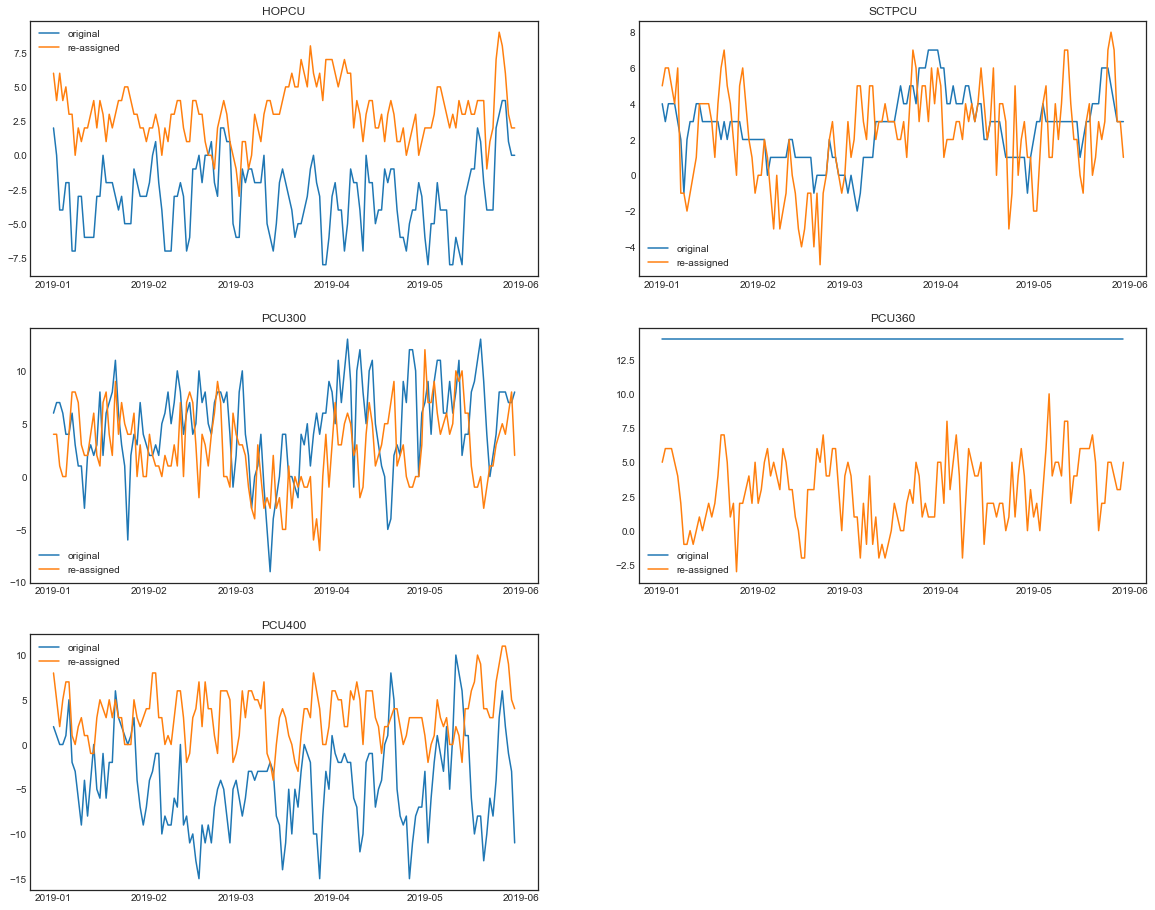

In [311]:
# f = plt.figure(figsize=(10,3))
# ax = f.add_subplot(121)
# ax2 = f.add_subplot(122)
# x = np.linspace(0,4,1000)
# ax.plot(x, np.sin(x))
# ax2.plot(x, np.cos(x), 'r:')

f = plt.figure(figsize=(20,16))
for i in range(len(units_to_consider)):
    unit = units_to_consider[i]
    ax = f.add_subplot(3, 2, i+1)
    ax.plot(results[0][unit], label = 'original')
    ax.plot(results[1][unit], label = 're-assigned')
    ax.legend()
    ax.title.set_text(unit)
    
# f = plt.figure(figsize=(10,3))
# # fig.subplots_adjust(hspace=1, wspace=2)
# for i in range(len(units_to_consider)):
#     unit = units_to_consider[i]
#     plt.subplot(3, 2, i+1)
#     plt.plot(results[0][unit])
# #     ax.text(0.5, 0.5, str((2, 3, i)),
# #            fontsize=18, ha='center')

In [ ]:
f = plt.figure(figsize=(20,16))
for i in range(len(units_to_consider)):
    unit = units_to_consider[i]
    ax = f.add_subplot(3, 2, i+1)
    ax.plot(results[0][unit], label = 'original')
    ax.plot(results[1][unit], label = 're-assigned')
    ax.legend()
    ax.title.set_text(unit)

In [284]:
off_capacity_daily

,HOPCU,SCTPCU,PCU300,PCU360,PCU400
Date,,,,,
2019-01-01,2.0,4.0,6.0,14.0,2.0
2019-01-02,0.0,3.0,7.0,14.0,1.0
2019-01-03,-4.0,4.0,7.0,14.0,0.0
2019-01-04,-4.0,4.0,6.0,14.0,0.0
2019-01-05,-2.0,4.0,4.0,14.0,1.0
2019-01-06,-2.0,3.0,4.0,14.0,5.0
2019-01-07,-7.0,2.0,6.0,14.0,-2.0
2019-01-08,-7.0,-1.0,3.0,14.0,-3.0
2019-01-09,-3.0,2.0,1.0,14.0,-6.0


In [280]:
a[('Hematology/Oncology', 'HOPCU')]

<gurobi.Var C690 (value 0.0)>

In [229]:
sol = pd.DataFrame()